In [ ]:
setwd("") #set appropriate working directory

In [2]:
df1 <- read.csv("relevant_gene_expression_sorted.csv")
df2 <- read.csv("gene_codeml_summary.tsv",sep = "\t")
df_merge <- merge(df1,df2,by="Gene")
df_subset <- df_merge[!is.na(df_merge$Omega), ]
df_subs_sort <- df_subset[order(df_subset$median_expression), ]
write.csv(df_subs_sort, file = "gene_expression_dnds_159_genes.csv", row.names = FALSE,quote=FALSE)
#saved this as a separate csv file and using that for the calculation - included in directory

Saving 6.67 x 6.67 in image


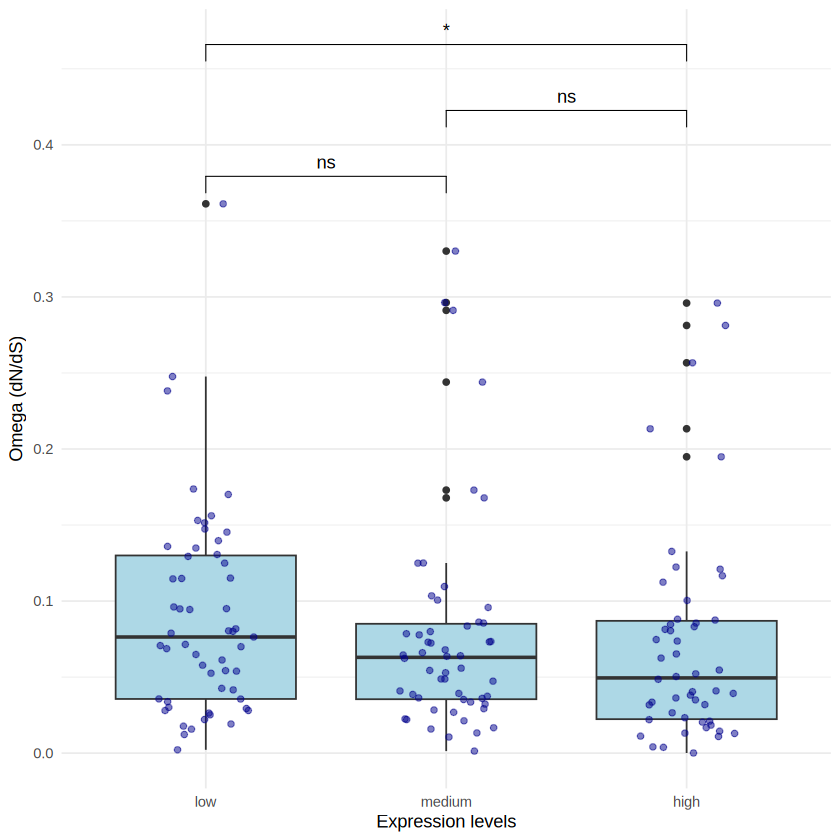

In [ ]:
library(ggplot2)
library(ggpubr)


df_exp = read.csv("gene_expression_dnds_159_genes.csv")
df_exp$category <- factor(df_exp$category, levels = c("low", "medium", "high"), ordered=TRUE)

exp_levels <- list(c("low", "medium"), c("medium", "high"), c("low", "high"))
ggplot(df_exp, aes(x = category, y = Omega)) +
  geom_boxplot(fill = "lightblue") +  # Boxplot
  geom_jitter(width = 0.2, alpha = 0.5, color = "darkblue")+
  labs(x = "Expression levels",
       y = "Omega (dN/dS)") +
       stat_compare_means(comparisons = exp_levels, label = "p.signif")+ #for p value - use p.format - the significant value is 0.043
  theme_minimal()

ggsave("dnds_calc_boxplot.pdf")
